<a href="https://colab.research.google.com/github/IoannisPan11/Breast_Tumor_Segmentation/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "./drive/My Drive/DIPLOMATIKH/panagiotopoulos_thesis/code/"

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1IYj7QrwcgQfHG1vv8M86Jaa2FE7p6yas/panagiotopoulos_thesis/code


In [ ]:
%%capture
!pip install pydicom
!pip3 install git+https://github.com/itzortzis/EMV_tool.git

In [ ]:
%pwd

'/content/drive/.shortcut-targets-by-id/1IYj7QrwcgQfHG1vv8M86Jaa2FE7p6yas/panagiotopoulos_thesis/code'

In [ ]:
import numpy as np
import os
from emv import utils
from matplotlib import pyplot as plt

In [ ]:
exp_name = "epochs50_FinalDataset_slr"
#exp_name = "epochs50_FinalDataset_llr"
#exp_name = "epochs100_FinalDataset_slr"
#exp_name = "epochs100_FinalDataset_llr"

  # Experiments List Creation

In [ ]:
iters = 20

tokens = exp_name.split('_')
epochs = int(tokens[0].replace("epochs", ""))
print(epochs)

exp_files = os.listdir(exp_name)
print(exp_files)

tr_loss = []
val_loss = []
tr_f1 = []
val_f1 = []
test = []

for f in exp_files:
  if f.startswith("Training_f1"):
    tr_f1.append(f)
  elif f.startswith("Validation_f1"):
    val_f1.append(f)
  elif f.startswith("Training_loss"):
    tr_loss.append(f)
  elif f.startswith("Validation_loss"):
    val_loss.append(f)
  else:
    test.append(f)

50
['Training_f1_1687860790.npy', 'Validation_f1_1687860790.npy', 'Training_loss_1687860790.npy', 'Validation_loss_1687860790.npy', 'Testing_f1_1687860790.npy', 'Training_f1_1687864245.npy', 'Validation_f1_1687864245.npy', 'Training_loss_1687864245.npy', 'Validation_loss_1687864245.npy', 'Testing_f1_1687864245.npy', 'Training_f1_1687866668.npy', 'Validation_f1_1687866668.npy', 'Training_loss_1687866668.npy', 'Validation_loss_1687866668.npy', 'Testing_f1_1687866668.npy', 'Training_f1_1688482248.npy', 'Validation_f1_1688482248.npy', 'Training_loss_1688482248.npy', 'Validation_loss_1688482248.npy', 'Testing_f1_1688482248.npy', 'Training_f1_1688484383.npy', 'Validation_f1_1688484383.npy', 'Training_loss_1688484383.npy', 'Validation_loss_1688484383.npy', 'Testing_f1_1688484383.npy', 'Training_f1_1688980400.npy', 'Validation_f1_1688980400.npy', 'Training_loss_1688980400.npy', 'Validation_loss_1688980400.npy', 'Testing_f1_1688980400.npy', 'Training_f1_1688985286.npy', 'Validation_f1_168898528

# Training F1

(50, 20, 1)


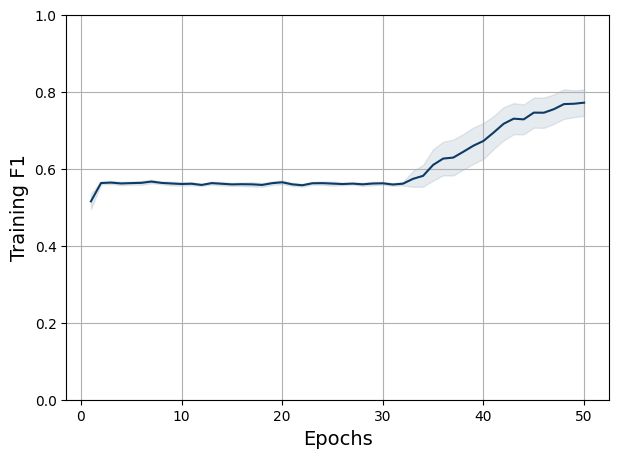

In [ ]:
tr_f1_np = np.zeros((epochs, iters, 1))

for i in range(len(tr_f1)):
  tmp = np.load(exp_name + '/' + tr_f1[i])
  tr_f1_np[:, i, :] = tmp


# Simulation configuration
gen_args = {
  "num_of_timepoints": epochs, # The number of experiment x-axis points
  "num_of_iterations": iters,  # The number of experiment repetitions
  "num_of_metrics": 1,      # The number of experiment metrics
  "metric_id": 0,           # Metric id for the sample metrics
  "window": 0.8             # Variation number
}

# Figure configuration
fig_args = {
  "fig_path": "test.png",
  "med_color": '#0d3b66',
  "var_color": '#0d3b66',
  "xlabel": 'Epochs',
  "ylabel": 'Training F1',
  "font_size": 14,
  "y_min": 0,
  "y_max": 1
}


print(tr_f1_np.shape)
ci_elems = utils.compute_ci(tr_f1_np, gen_args)
utils.plot_metrics_ci(ci_elems, gen_args["num_of_timepoints"], fig_args)

# Training Loss

(50, 20, 1)


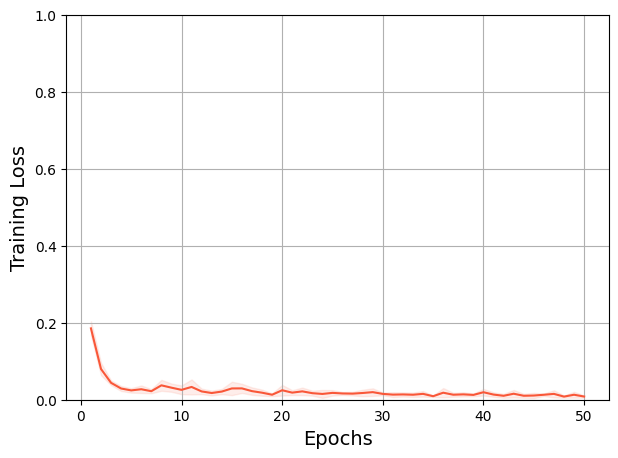

In [ ]:
tr_loss_np = np.zeros((epochs, iters, 1))

for i in range(len(tr_loss)):
  tmp = np.load(exp_name + '/' + tr_loss[i])
  tr_loss_np[:, i, :] = tmp


# Simulation configuration
gen_args = {
  "num_of_timepoints": epochs, # The number of experiment x-axis points
  "num_of_iterations": iters,  # The number of experiment repetitions
  "num_of_metrics": 1,      # The number of experiment metrics
  "metric_id": 0,           # Metric id for the sample metrics
  "window": 0.8             # Variation number
}

# Figure configuration
fig_args = {
  "med_color": '#f95738',
  "var_color": '#f95738',
  "xlabel": 'Epochs',
  "ylabel": 'Training Loss',
  "font_size": 14,
  "y_min": 0,
  "y_max": 1
}


print(tr_f1_np.shape)
ci_elems = utils.compute_ci(tr_loss_np, gen_args)
utils.plot_metrics_ci(ci_elems, gen_args["num_of_timepoints"], fig_args)

# Validation F1

(50, 20, 1)


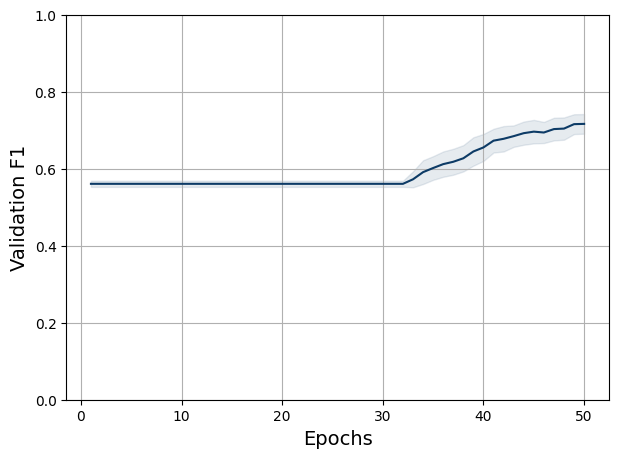

In [ ]:
val_f1_np = np.zeros((epochs, iters, 1))

for i in range(len(val_f1)):
  tmp = np.load(exp_name + '/' + val_f1[i])
  val_f1_np[:, i, :] = tmp


# Simulation configuration
gen_args = {
  "num_of_timepoints": epochs, # The number of experiment x-axis points
  "num_of_iterations": iters,  # The number of experiment repetitions
  "num_of_metrics": 1,      # The number of experiment metrics
  "metric_id": 0,           # Metric id for the sample metrics
  "window": 0.8             # Variation number
}

# Figure configuration
fig_args = {
  "med_color": '#0d3b66',
  "var_color": '#0d3b66',
  "xlabel": 'Epochs',
  "ylabel": 'Validation F1',
  "font_size": 14,
  "y_min": 0,
  "y_max": 1
}


print(tr_f1_np.shape)
ci_elems = utils.compute_ci(val_f1_np, gen_args)
utils.plot_metrics_ci(ci_elems, gen_args["num_of_timepoints"], fig_args)

#Validation Loss

(50, 20, 1)


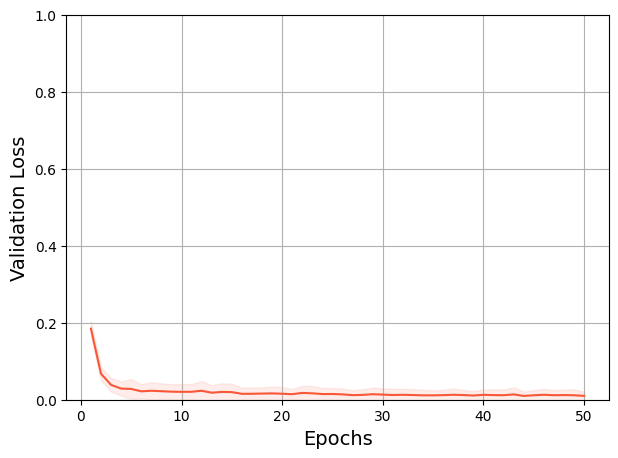

In [ ]:
val_loss_np = np.zeros((epochs, iters, 1))

for i in range(len(val_loss)):
  tmp = np.load(exp_name + '/' + val_loss[i])
  val_loss_np[:, i, :] = tmp


# Simulation configuration
gen_args = {
  "num_of_timepoints": epochs, # The number of experiment x-axis points
  "num_of_iterations": iters,  # The number of experiment repetitions
  "num_of_metrics": 1,      # The number of experiment metrics
  "metric_id": 0,           # Metric id for the sample metrics
  "window": 0.8             # Variation number
}

# Figure configuration
fig_args = {
  "med_color": '#f95738',
  "var_color": '#f95738',
  "xlabel": 'Epochs',
  "ylabel": 'Validation Loss',
  "font_size": 14,
  "y_min": 0,
  "y_max": 1
}


print(tr_f1_np.shape)
ci_elems = utils.compute_ci(val_loss_np, gen_args)
utils.plot_metrics_ci(ci_elems, gen_args["num_of_timepoints"], fig_args)

In [ ]:
s = 0
for i in range(len(test)):
  t = np.load(exp_name + '/' + test[i])
  # print(t)
  s += t[0]

avg = s / iters

print("Final testing score: ", avg)

Final testing score:  0.7196611072868108
